# Classiq Coding Competition Spring 2022
### First Place Kakuro Submission by Adam Glos and &Ouml;zlem Salehi
Utilizes clever state preparation to reduce oracle cx count.

## Checking Oracle CX Count

In [12]:
from qiskit import QuantumCircuit

qasm_str = """OPENQASM 2.0;
include "qelib1.inc";
qreg q[17];
cx q[2],q[4];
u3(pi,0,-pi) q[4];
u2(pi/4,-pi) q[8];
cx q[4],q[8];
u1(-pi/4) q[8];
cx q[3],q[8];
u1(pi/4) q[8];
cx q[4],q[8];
u3(pi,0,-pi) q[4];
cx q[2],q[4];
u3(pi,0,-pi) q[4];
u2(0,-pi/4) q[8];
u2(pi/4,-pi) q[9];
cx q[4],q[9];
u1(-pi/4) q[9];
cx q[3],q[9];
u3(pi,0,-pi) q[3];
u1(pi/4) q[9];
cx q[4],q[9];
u3(pi,0,-pi) q[4];
cx q[5],q[4];
u3(pi,0,-pi) q[4];
u2(0,3*pi/4) q[9];
u2(pi/4,-pi) q[10];
cx q[4],q[10];
u1(-pi/4) q[10];
cx q[3],q[10];
u1(pi/4) q[10];
cx q[4],q[10];
u2(0,-pi/4) q[10];
u3(pi,0,-pi) q[4];
cx q[5],q[4];
cx q[1],q[4];
u3(pi,0,-pi) q[4];
u2(pi/4,-pi) q[11];
cx q[4],q[11];
u1(-pi/4) q[11];
cx q[3],q[11];
u1(pi/4) q[11];
cx q[4],q[11];
u3(pi,0,-pi) q[4];
cx q[1],q[4];
cx q[5],q[4];
u3(pi,0,-pi) q[4];
u2(pi/4,-pi) q[12];
cx q[4],q[12];
u1(-pi/4) q[12];
cx q[3],q[12];
u1(pi/4) q[12];
u2(-3*pi/4,-pi) q[3];
cx q[4],q[12];
u2(0,-pi/4) q[12];
u3(pi,0,-pi) q[4];
cx q[5],q[4];
cx q[4],q[3];
u1(-pi/4) q[3];
cx q[2],q[3];
u1(pi/4) q[3];
cx q[4],q[3];
cx q[2],q[4];
cx q[4],q[3];
u1(-pi/4) q[3];
cx q[5],q[3];
u1(pi/4) q[3];
cx q[4],q[3];
u2(0,3*pi/4) q[3];
cx q[5],q[4];
u2(pi/4,-pi) q[13];
cx q[4],q[13];
u1(-pi/4) q[13];
cx q[3],q[13];
u1(pi/4) q[13];
cx q[4],q[13];
u2(0,3*pi/4) q[13];
u2(pi/4,-pi) q[14];
cx q[13],q[14];
u1(-pi/4) q[14];
cx q[8],q[14];
u1(pi/4) q[14];
cx q[13],q[14];
u2(0,3*pi/4) q[14];
u2(pi/4,-pi) q[15];
cx q[14],q[15];
u1(-pi/4) q[15];
cx q[9],q[15];
u1(pi/4) q[15];
cx q[14],q[15];
u2(0,3*pi/4) q[15];
cx q[15],q[12];
u1(-pi/4) q[12];
cx q[10],q[12];
u1(pi/4) q[12];
cx q[15],q[12];
u1(-pi/4) q[12];
cx q[10],q[12];
u2(-3*pi/4,-3*pi/4) q[12];
u1(pi/4) q[15];
cx q[10],q[15];
u1(pi/4) q[10];
u1(-pi/4) q[15];
cx q[10],q[15];
u2(-3*pi/4,-pi) q[10];
u2(pi/4,-pi) q[15];
cx q[14],q[15];
u1(-pi/4) q[15];
cx q[9],q[15];
u1(pi/4) q[15];
cx q[14],q[15];
u2(pi/4,-pi) q[14];
cx q[13],q[14];
u1(-pi/4) q[14];
u2(0,3*pi/4) q[15];
cx q[8],q[14];
u1(pi/4) q[14];
cx q[13],q[14];
u2(pi/4,-pi) q[13];
u2(0,3*pi/4) q[14];
cx q[4],q[13];
u1(-pi/4) q[13];
cx q[3],q[13];
u1(pi/4) q[13];
u2(pi/4,-pi) q[3];
cx q[4],q[13];
u2(0,3*pi/4) q[13];
cx q[5],q[4];
cx q[4],q[3];
u1(-pi/4) q[3];
cx q[5],q[3];
u1(pi/4) q[3];
cx q[4],q[3];
cx q[2],q[4];
cx q[4],q[3];
u1(-pi/4) q[3];
cx q[2],q[3];
u1(pi/4) q[3];
cx q[4],q[3];
u2(0,-pi/4) q[3];
cx q[5],q[4];
u3(pi,0,-pi) q[4];
cx q[4],q[12];
u1(-pi/4) q[12];
cx q[3],q[12];
u1(pi/4) q[12];
cx q[4],q[12];
u2(0,3*pi/4) q[12];
u3(pi,0,-pi) q[4];
cx q[5],q[4];
cx q[1],q[4];
u3(pi,0,-pi) q[4];
cx q[4],q[11];
u1(-pi/4) q[11];
cx q[3],q[11];
u1(pi/4) q[11];
cx q[4],q[11];
u2(0,3*pi/4) q[11];
u3(pi,0,-pi) q[4];
cx q[1],q[4];
cx q[5],q[4];
u3(pi,0,-pi) q[4];
cx q[4],q[10];
u1(-pi/4) q[10];
cx q[3],q[10];
u1(pi/4) q[10];
u3(pi,0,-pi) q[3];
cx q[4],q[10];
u2(0,3*pi/4) q[10];
u3(pi,0,-pi) q[4];
cx q[5],q[4];
u3(pi,0,-pi) q[4];
u2(-3*pi/4,-pi) q[8];
u2(pi/4,-pi) q[9];
cx q[4],q[9];
u1(-pi/4) q[9];
cx q[3],q[9];
u1(pi/4) q[9];
cx q[4],q[9];
u3(pi,0,-pi) q[4];
cx q[2],q[4];
u3(pi,0,-pi) q[4];
cx q[4],q[8];
u1(-pi/4) q[8];
cx q[3],q[8];
u1(pi/4) q[8];
cx q[4],q[8];
u3(pi,0,-pi) q[4];
cx q[2],q[4];
u2(0,3*pi/4) q[8];
u2(0,3*pi/4) q[9];
"""

Oracle = QuantumCircuit.from_qasm_str(qasm_str)

print(f"Original oracle depth: {Oracle.depth()}")
print(f"Original operation count: {Oracle.count_ops()}")

# Checking circuit is fully decomposed
from qiskit import transpile
Oracle = transpile(Oracle, basis_gates=['u', 'cx'])

print(f"Decomposed oracle depth: {Oracle.depth()}")
print(f"Decomposed operation count: {Oracle.count_ops()}")

Original oracle depth: 156
Original operation count: OrderedDict([('cx', 86), ('u1', 46), ('u2', 34), ('u3', 22)])
Decomposed oracle depth: 156
Decomposed operation count: OrderedDict([('u', 102), ('cx', 86)])


## Executing Grover Circuit

In [14]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.compiler import transpile


def mcz_gate(n, control, target, ancilla):
    qc = QuantumCircuit(n)
    qc.h(target)
    qc.mct(
        control,
        target,
        ancilla_qubits=ancilla,
        mode="v-chain",
    )
    qc.h(target)
    return qc


def diffusion(n, initial):
    qc = QuantumCircuit(2 * n - 3)
    qc.compose(initial.inverse(), inplace=True)
    for i in range(n):
        qc.x(i)
    qc.compose(
        mcz_gate(2 * n - 3, list(range(n - 1)), n - 1, list(range(n, 2 * n - 3))),
        inplace=True,
    )
    for i in range(n):
        qc.x(i)
    qc.compose(initial, inplace=True)
    return qc


def initial_state():
    qc = QuantumCircuit(8)

    # x0!= x2
    qc.h(2)
    qc.cx(2, 0)
    qc.x(0)
    # x1!= x0
    qc.cx(0, 1)
    qc.x(1)
    # x5!= x1
    qc.cx(1, 6)
    qc.x(6)
    # x6!= x5
    qc.cx(6, 7)
    qc.x(7)
    # x4 != x6
    qc.cx(7, 5)
    qc.x(5)

    qc.h(2)
    qc.h(3)
    qc.h(4)

    return qc


def mark_state(n, cons_list, anc_list):
    qc = QuantumCircuit(n)
    qc.compose(mcz_gate(n, cons_list[0:-2], cons_list[-1], anc_list), inplace=True)
    return qc


def xor(qc, x1, x2):
    qc.cx(x1, x2)


def neq_x3(qc, x, output):
    xor(qc, x, 4)
    qc.x(3)
    qc.x(4)
    qc.rccx(3, 4, output)
    qc.x(output)
    qc.x(3)
    qc.x(4)
    xor(qc, x, 4)


def oracle_n():
    nvars = 8
    cons_list = [3, 4, 8, 9, 10, 11, 12]
    ncons = 5
    nanc = len(cons_list) - 3
    anc_list = list(
        range(nvars + ncons, nvars + ncons + nanc)
    )  # ancilla list to be used with mct for the cons_list
    n = nvars + ncons + nanc

    qc = QuantumCircuit(n)
    # x0-0, x1-1, x2-2, x3-34, x4-5, x5-6, x6-7

    # x2 + 2 != x3 -> 8
    xor(qc, 2, 4)
    qc.x(4)
    qc.rccx(3, 4, 8)
    qc.x(8)
    qc.x(4)
    xor(qc, 2, 4)

    # x3 == 2 -> 9
    qc.x(4)
    qc.rccx(3, 4, 9)
    qc.x(4)

    # x3 != x4 -> 10
    neq_x3(qc, 5, 10)

    # x1 != x3 -> 11
    neq_x3(qc, 1, 11)

    # x3 != x5 -> 12
    neq_x3(qc, 5, 12)

    # x2 + x4 + x3 == 3
    qc.rccx(2, 4, 3)
    qc.cx(2, 4)
    qc.rccx(5, 4, 3)
    qc.cx(5, 4)
    return qc, cons_list, anc_list, n, ncons


def oracle_operation(oracle, mark):
    return oracle + mark + oracle.inverse()


def grover(n, initial, oracle_op, it, nvars):
    qreg = QuantumRegister(n)
    creg = ClassicalRegister(nvars)
    qc = QuantumCircuit(qreg, creg)

    qc.compose(initial, inplace=True)
    qc.barrier()

    for _ in range(it):
        qc.compose(oracle_op, inplace=True)
        qc.barrier()
        qc.compose(diffusion(nvars, initial), inplace=True)
        qc.barrier()

    qc.measure(qreg[0:nvars], creg)

    return qc


def decompose(qc):
    tp = transpile(qc, basis_gates=["u1", "u2", "u3", "cx"])
    return tp, tp.depth(), tp.count_ops()


if __name__ == "__main__":
    nvars = 8
    oracle, cons_list, anc_list, n, ncons = oracle_n()
    mark = mark_state(n, cons_list, anc_list)
    oracle_op = oracle_operation(oracle, mark)
    initial = initial_state()

    correct_answer = "10001110"
    for it in range(1, 5):
        qc = grover(n, initial, oracle_op, it, nvars)
        job = execute(qc, Aer.get_backend("qasm_simulator"), shots=1000)
        counts = job.result().get_counts(qc)
        print(f"{it} iterations: {counts[correct_answer]/1000 * 100}% success")

    tp, depth, ops = decompose(oracle_op)
    print("Depth:", depth)
    print("Operations:", ops)
    print("Operations cx:", ops['cx'])
    if False:
        tp.qasm(filename="submission2.qasm")

/var/folders/73/8lvzg2751x73_61g00srrbvm0000gn/T/ipykernel_54613/4256465854.py:125: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return oracle + mark + oracle.inverse()


1 iterations: 47.8% success
2 iterations: 91.10000000000001% success
3 iterations: 95.7% success
4 iterations: 56.3% success
Depth: 156
Operations: OrderedDict([('cx', 86), ('u1', 46), ('u2', 34), ('u3', 22)])
Operations cx: 86


{'10001110': 579, '10001010': 40, '01101101': 36, '10011110': 36, '10010110': 34, '01101001': 31, '10010010': 28, '10000010': 28, '10011010': 28, '10000110': 27, '01111101': 27, '01100101': 24, '01110101': 24, '01100001': 23, '01110001': 21, '01111001': 14}


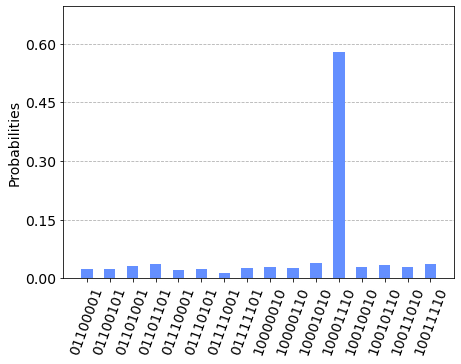

In [21]:
from qiskit import Aer, execute

simulator = Aer.get_backend('qasm_simulator')


job = execute(qc, simulator, shots=1000)
result = job.result()

counts = result.get_counts(qc)

solutions = dict(reversed(sorted(counts.items(), key=lambda item: item[1])))
print(solutions)

from qiskit.visualization import plot_histogram
plot_histogram(counts, bar_labels=False)

In [20]:
results = [(k, v, v/8000) for k, v in sorted(counts.items(), key = lambda x: x[1], reverse=True)]
results[:6]
solution = results[0][0]
final_answer = 'x0 = ' + str(int(solution[7]) + 2)
final_answer += ', x1 = ' + solution[6]
final_answer += ', x2 = ' + str(int(solution[5]) + 2)
final_answer += ', x3 = ' + str(int(solution[3:5], base=2))
final_answer += ', x4 = ' + solution[2]
final_answer += ', x5 = ' + solution[1]
final_answer += ', x6 = ' + solution[0]
final_answer

'x0 = 2, x1 = 1, x2 = 3, x3 = 1, x4 = 0, x5 = 0, x6 = 1'